In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("FIFA17_official_data.csv")

This code from chatgpt is working because we already have the generated qr and it is not generating that from the missiong values in the dataset



/var/folders/rs/vw9d1xfd0klf2026jqgg1db00000gn/T/ipykernel_24652/1173503708.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        92.0
1        86.0
2        87.0
3        86.0
4        88.0
         ... 
17555    54.0
17556    57.0
17557    53.0
17558    50.0
17559    46.0
Name: Overall, Length: 17560, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_qr.iloc[:, :] = df_qr.iloc[:, :].mask(mask)
/var/folders/rs/vw9d1xfd0klf2026jqgg1db00000gn/T/ipykernel_24652/1173503708.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        92.0
1        86.0
2        87.0
3        89.0
4        94.0
         ... 
17555    72.0
17556    57.0
17557    67.0
17558    66.0
17559    63.0
Name: Potential, Length: 17560, dtype: float64' has dtype incompatible with int64, please explicitly cast to

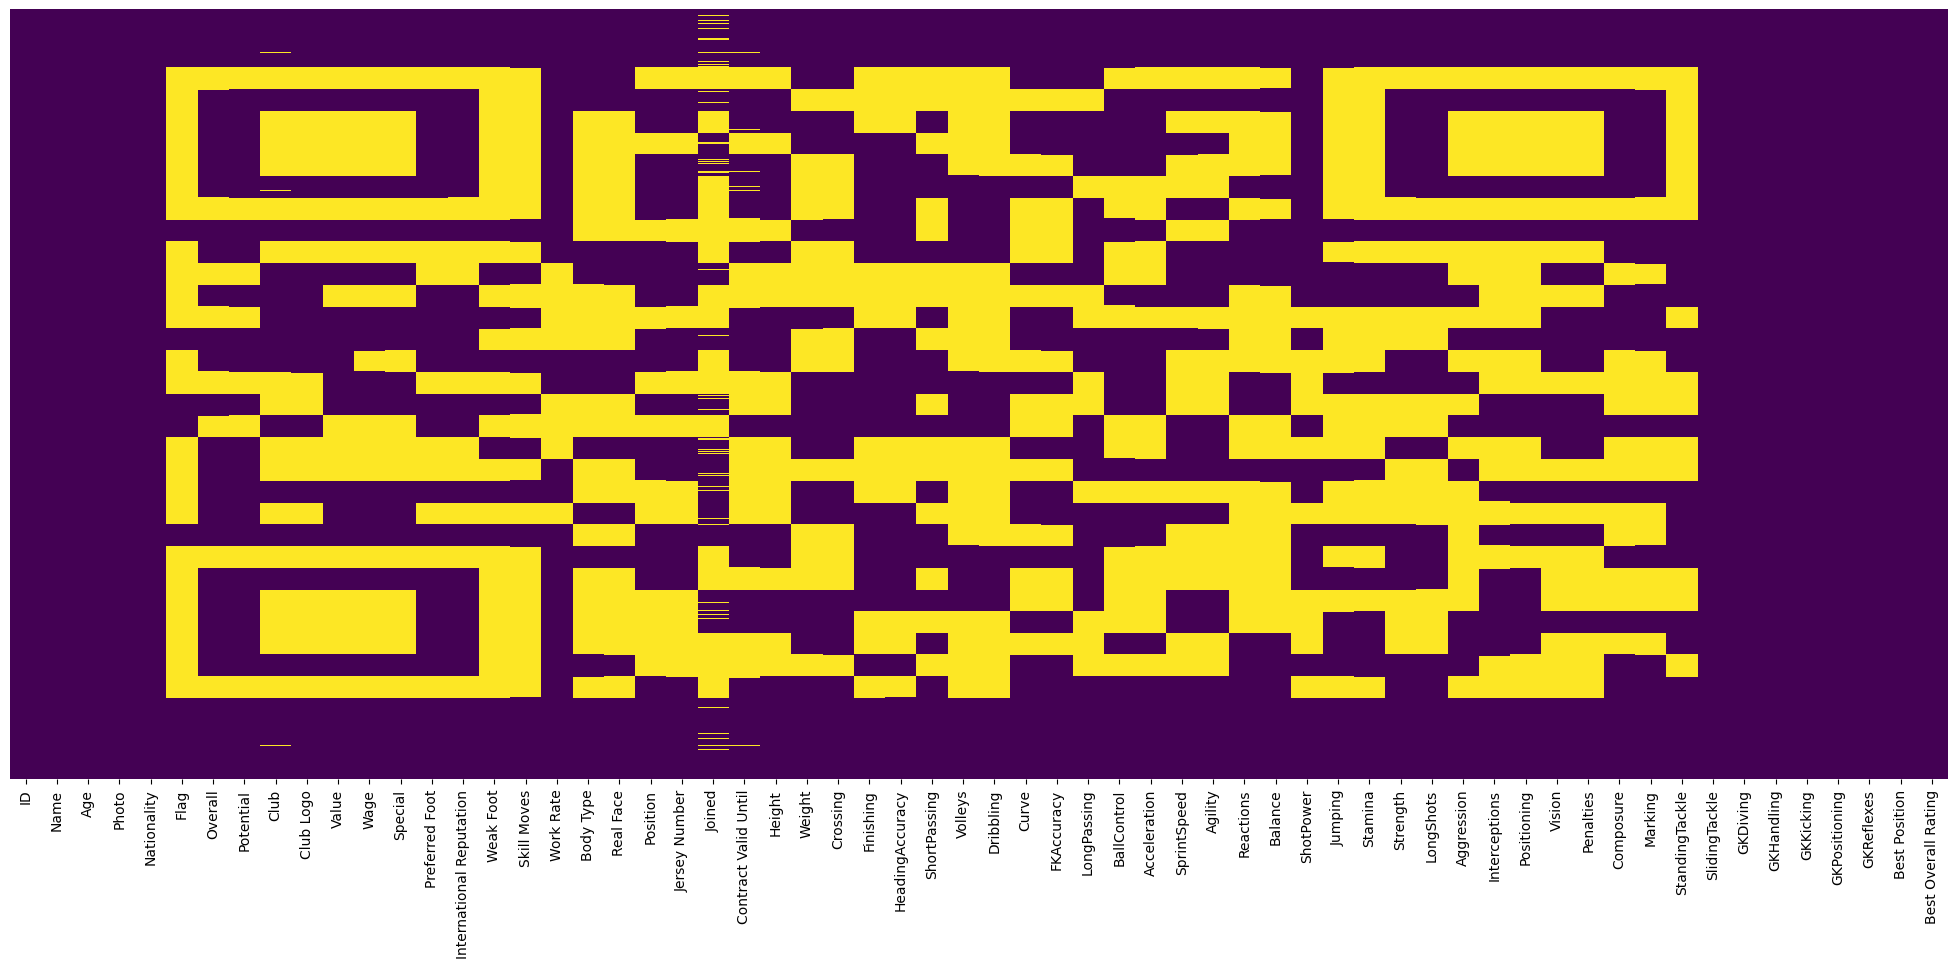

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# 1. Load dataset
df = pd.read_csv("FIFA17_official_data.csv")
df = df.drop(columns="Loaned From")

# 2. Load QR code as grayscale
qr = Image.open("78BC4482-7C26-4A66-A3CC-C79774204F00.jpg").convert("L")

# 3. Convert to binary matrix (black=1, white=0)
qr = qr.resize((df.shape[1], df.shape[0]))   # resize to dataset shape
qr_array = np.array(qr)
qr_binary = (qr_array < 128).astype(int)     # thresholding

# 4. Force NaN values according to QR pattern
df_qr = df.copy()
mask = qr_binary == 1   # black squares → NaN
df_qr.iloc[:, :] = df_qr.iloc[:, :].mask(mask)

# 5. Plot null heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df_qr.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [10]:
df.isnull().sum()

ID                     0
Name                   0
Age                    0
Photo                  0
Nationality            0
                      ..
GKKicking              0
GKPositioning          0
GKReflexes             0
Best Position          0
Best Overall Rating    0
Length: 62, dtype: int64

<Axes: >

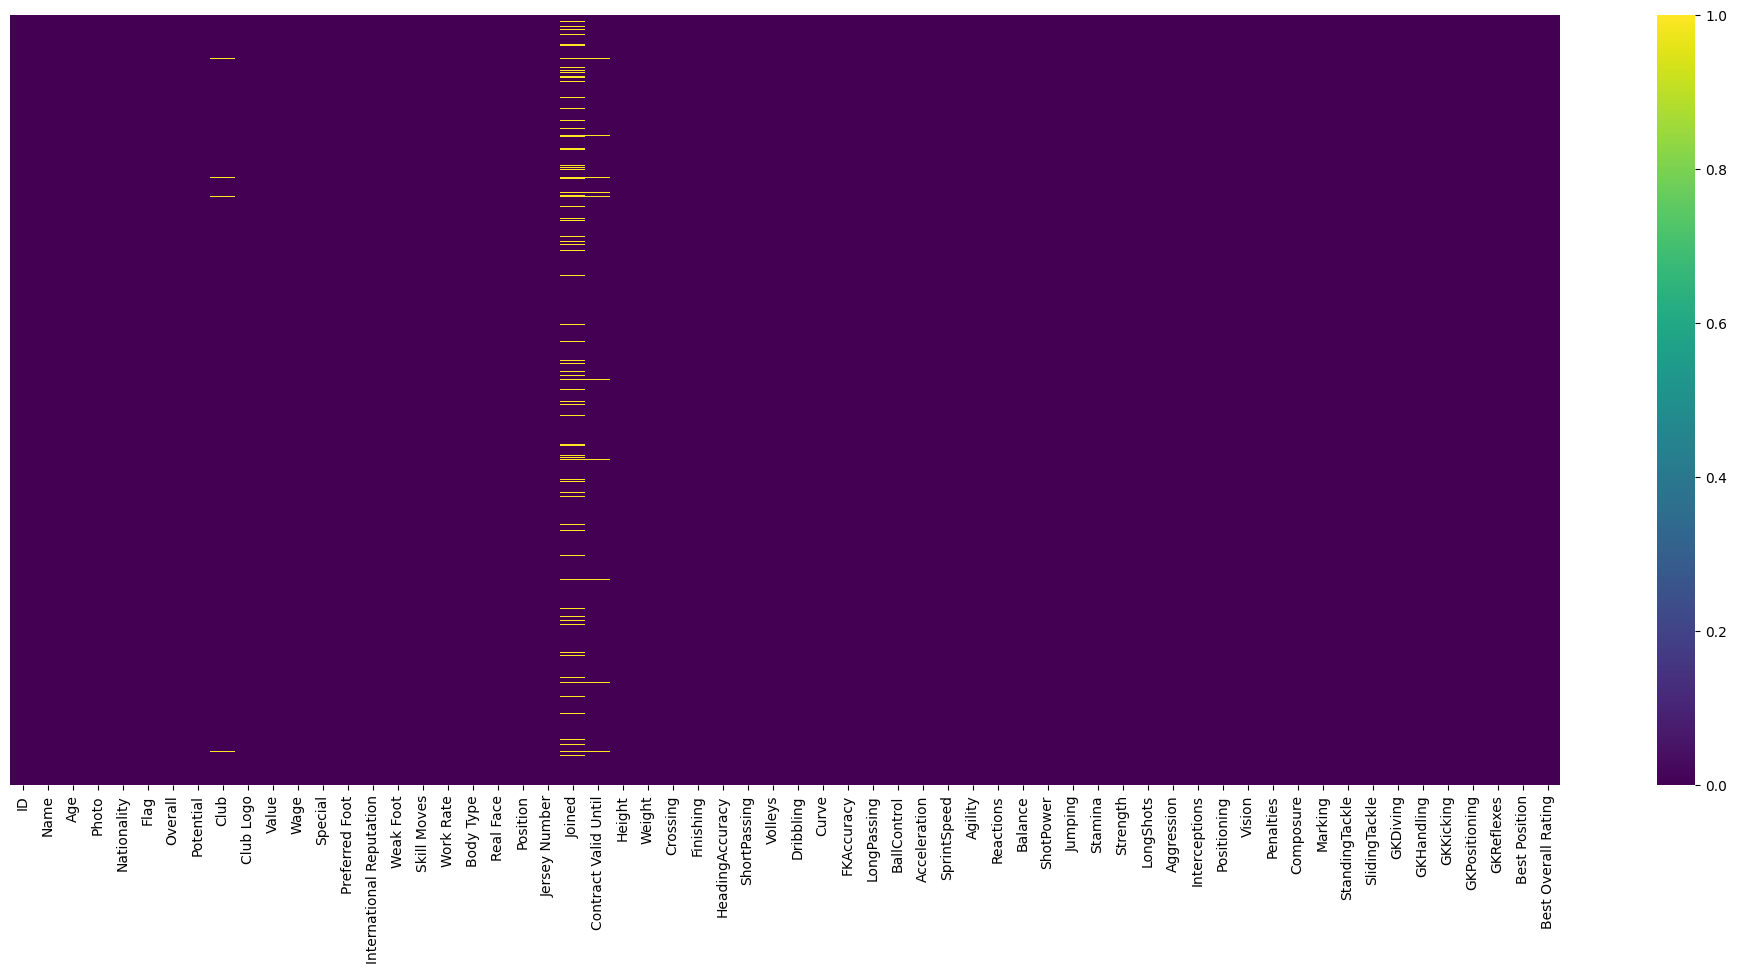

In [12]:
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [13]:
df = df.dropna()

In [30]:
import pandas as pd
import numpy as np
from PIL import Image

df = pd.read_csv("FIFA17_official_data.csv")
df = df.drop(columns="Loaned From")
df = df.drop(columns = "Joined")
df = df.dropna()

qr = Image.open("78BC4482-7C26-4A66-A3CC-C79774204F00.jpg").convert("L")

qr = qr.resize((df.shape[1], df.shape[0]))
qr_array = np.array(qr)
qr_binary = (qr_array < 128).astype(int)   # black=1, white=0

df_qr = df.copy()
mask = qr_binary == 1
df_qr.iloc[:, :] = df_qr.iloc[:, :].mask(mask)

df_qr.to_csv("FIFA17_hidden_qr.csv", index=False)

/var/folders/rs/vw9d1xfd0klf2026jqgg1db00000gn/T/ipykernel_24652/1178055330.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        92.0
1        86.0
2        87.0
3        86.0
4        88.0
         ... 
17555    54.0
17556    57.0
17557    53.0
17558    50.0
17559    46.0
Name: Overall, Length: 17198, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_qr.iloc[:, :] = df_qr.iloc[:, :].mask(mask)
/var/folders/rs/vw9d1xfd0klf2026jqgg1db00000gn/T/ipykernel_24652/1178055330.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        92.0
1        86.0
2        87.0
3        89.0
4        94.0
         ... 
17555    72.0
17556    57.0
17557    67.0
17558    66.0
17559    63.0
Name: Potential, Length: 17198, dtype: float64' has dtype incompatible with int64, please explicitly cast to

<Axes: >

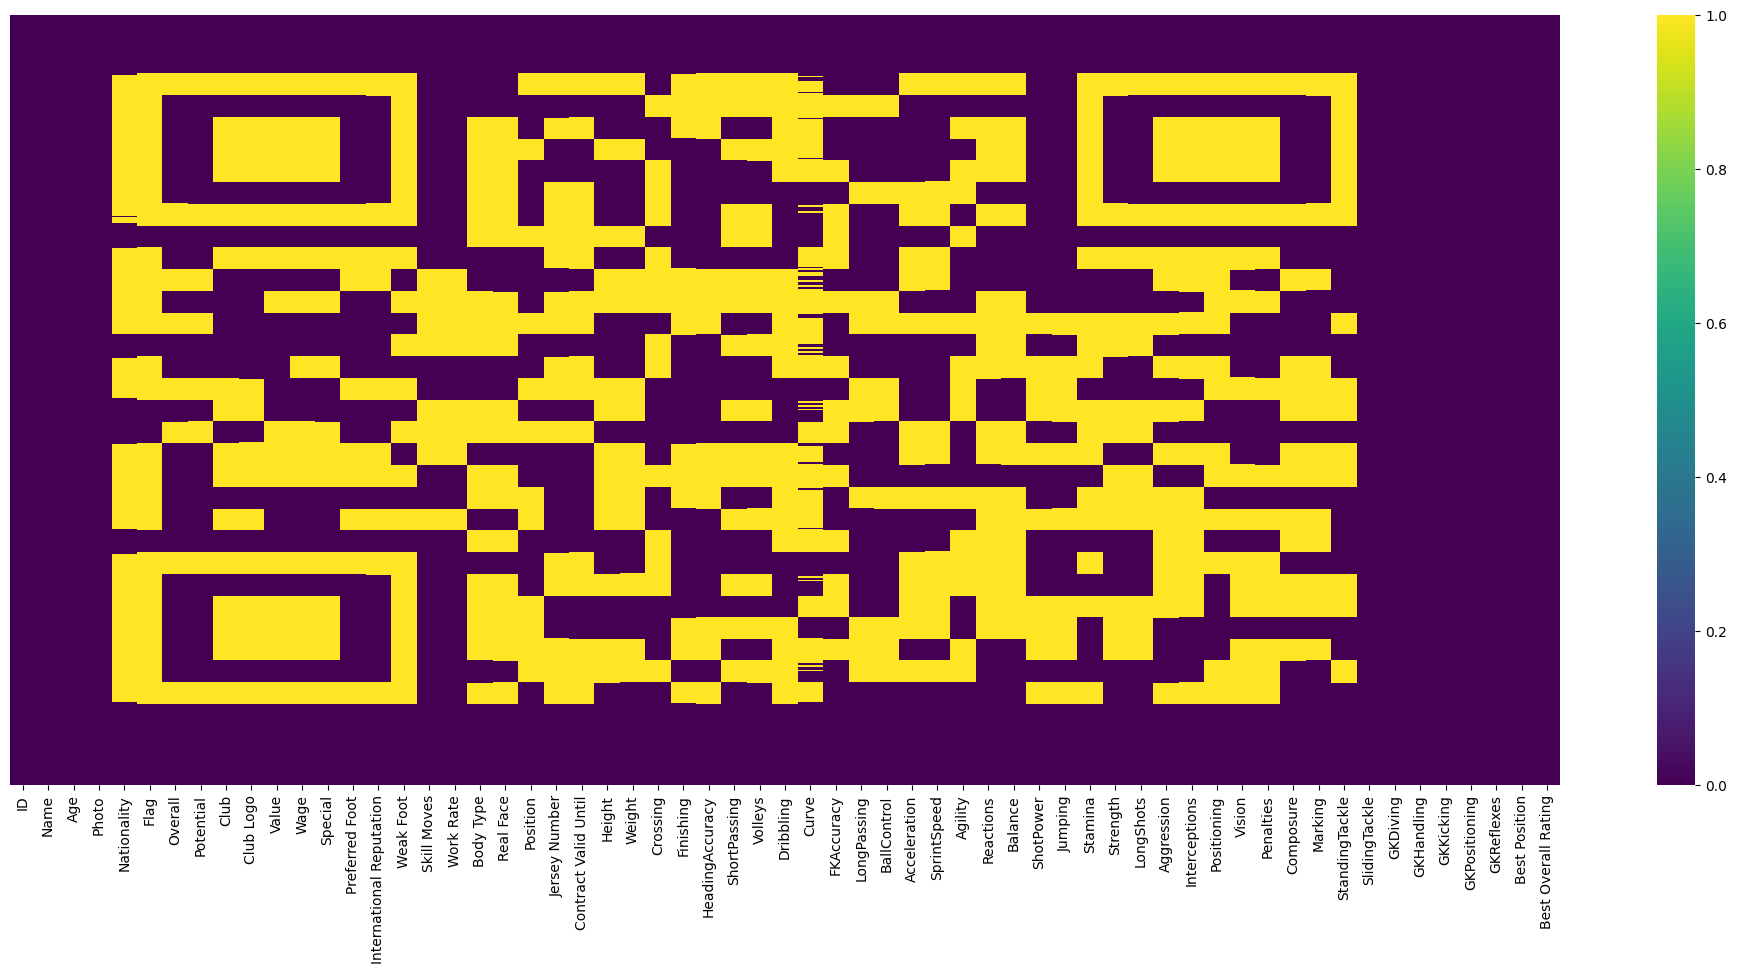

In [31]:
plt.figure(figsize=(25,10))
sns.heatmap(df_qr.isnull(),yticklabels=False,cmap='viridis')

In [44]:
df_qr

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92.0,92.0,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86.0,86.0,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87.0,87.0,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86.0,89.0,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88.0,94.0,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17555,233215,C. Addai,18,https://cdn.sofifa.com/players/233/215/17_60.png,Ghana,https://cdn.sofifa.com/flags/gh.png,54.0,72.0,Coventry City,https://cdn.sofifa.com/teams/1800/light_30.png,...,8.0,13.0,13.0,51.0,51.0,48.0,59.0,60.0,GK,53.0
17556,232911,R. Kamiyama,31,https://cdn.sofifa.com/players/232/911/17_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,57.0,57.0,Avispa Fukuoka,https://cdn.sofifa.com/teams/113186/light_30.png,...,6.0,10.0,11.0,59.0,46.0,41.0,62.0,59.0,GK,56.0
17557,235387,B. Gaye,18,https://cdn.sofifa.com/players/235/387/17_60.png,Germany,https://cdn.sofifa.com/flags/de.png,53.0,67.0,DSC Arminia Bielefeld,https://cdn.sofifa.com/teams/159/light_30.png,...,9.0,13.0,12.0,54.0,50.0,49.0,54.0,58.0,GK,52.0
17558,237904,K. Olifirenko,18,https://cdn.sofifa.com/players/237/904/17_60.png,Russia,https://cdn.sofifa.com/flags/ru.png,50.0,66.0,FC Tom Tomsk,https://cdn.sofifa.com/teams/110233/light_30.png,...,8.0,13.0,13.0,47.0,59.0,52.0,44.0,49.0,GK,49.0


In [38]:
pd.set_option('display.max_rows', None)

df_qr.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                 11314
Flag                        11695
Overall                      3970
Potential                    3896
Club                         7759
Club Logo                    7720
Value                        7288
Wage                         7757
Special                      7761
Preferred Foot               4874
International Reputation     4963
Weak Foot                   10221
Skill Moves                  3878
Work Rate                    3874
Body Type                    9215
Real Face                    9163
Position                     5820
Jersey Number                7705
Contract Valid Until         7812
Height                       6837
Weight                       6804
Crossing                     6835
Finishing                    5755
HeadingAccuracy              5847
ShortPassing                 7274
Volleys       

In [40]:
pd.reset_option('display.max_rows')

In [42]:
df = pd.read_csv("FIFA17_official_data.csv")
df = df.drop(columns="Loaned From")
df = df.drop(columns = "Joined")
df = df.dropna()

after comparing both the graph with the qr and the one down below we can infer that we have cleared all the null values from the dataset before plotting the qr on the heatmap (there is some error in injecting the null value in one of the columns while plotting the qr which is giving us some additional null values , but with this amount of error we are still able to scan the qr properly )

<Axes: >

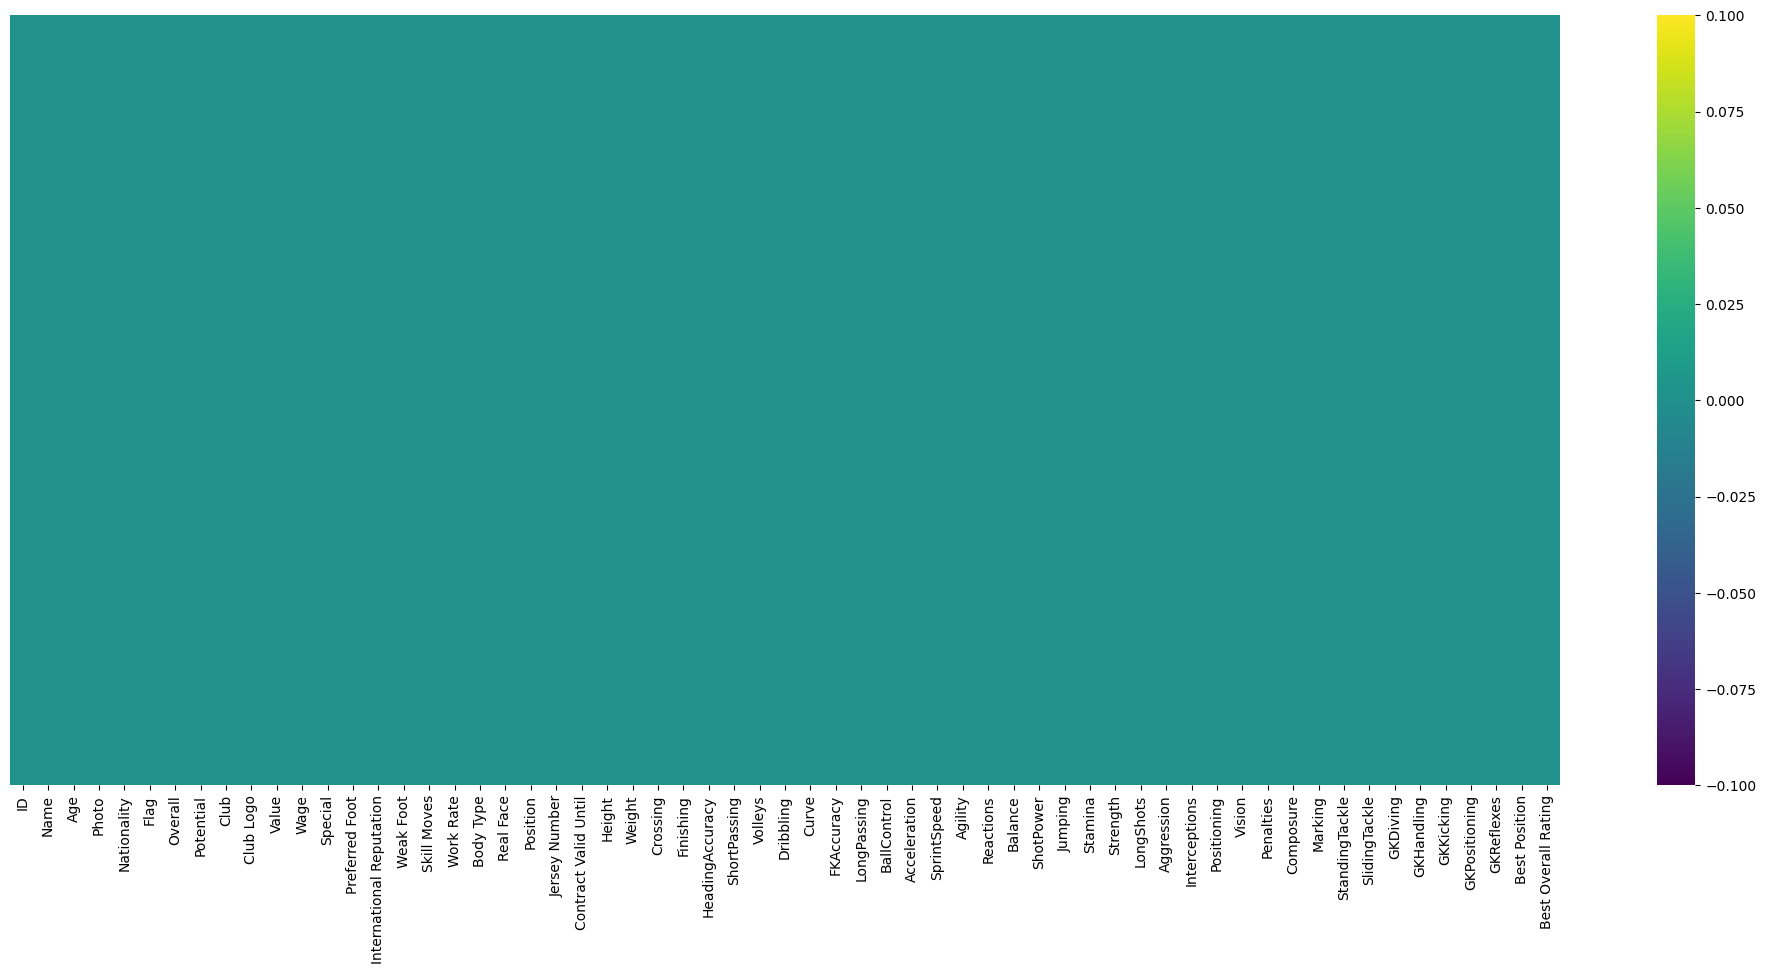

In [43]:
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')